In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

## Visualización

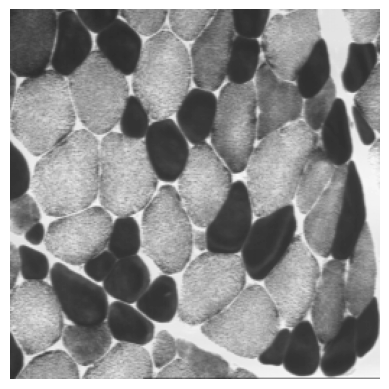

In [6]:
muscle= cv2.imread('img_lab2/MUSCLE.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(muscle,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

57


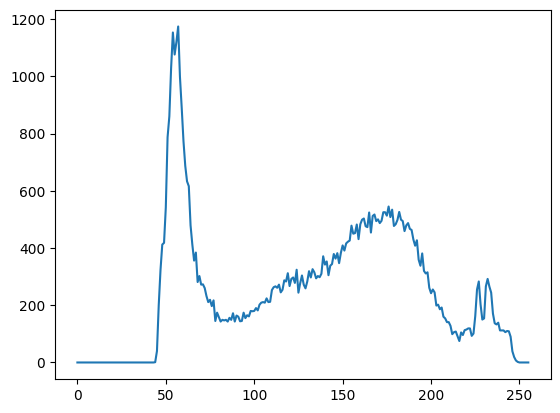

In [48]:
hist=cv2.calcHist([muscle], [0], None, [256], [0, 256])
plt.plot(hist)
print (np.argmax(hist))

### ¿Cuál es este valor?

El valor S sería 80, basandose en el histograma y en las pruebas al tanteo realizadas.

## Calibración del Histograma

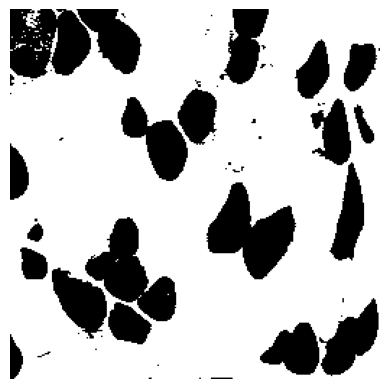

In [50]:
rescaled_img = exposure.rescale_intensity(muscle, in_range=(80,81), out_range=(0,255)).astype(np.uint8)
plt.imshow(rescaled_img,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


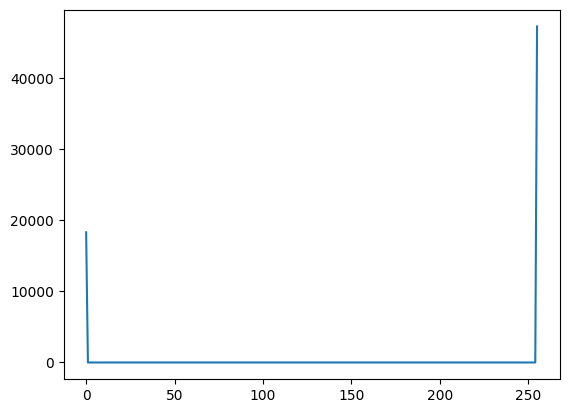

In [43]:
hist = cv2.calcHist([rescaled_img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

### ¿Cuál es su conclusión?
Con la calibración del histograma se logra una separación casi perfecta de la fibras oscuras al llevar la imagen a una binaria basándose en su umbral.

## Umbralización Simple

80.0


(-0.5, 255.5, 255.5, -0.5)

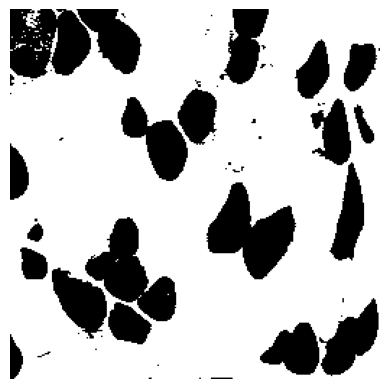

In [52]:
thres_value, thres_image = cv2.threshold(muscle, 80, 255, cv2.THRESH_BINARY)
print(thres_value)
plt.imshow(thres_image,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

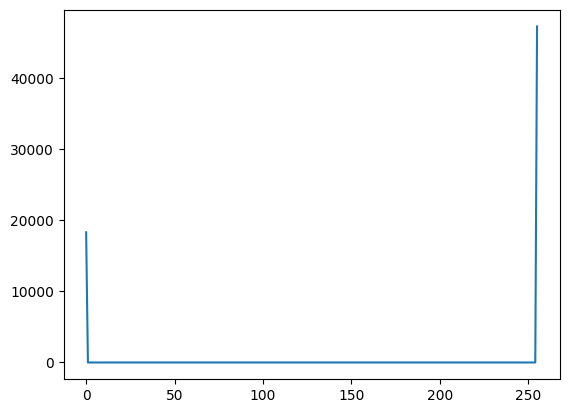

In [54]:
hist = cv2.calcHist([thres_image], [0], None, [256], [0, 256])
plt.plot(hist)

### ¿Conclusión?

Al hacer una umbralización binaria (basándose en el resultado anterior), se obtiene prácticamennte la misma imagen que con la calibración del histograma. Esto se debe a el cálculo manual del umbral.

## Umbralización Automática

125.0


(-0.5, 255.5, 255.5, -0.5)

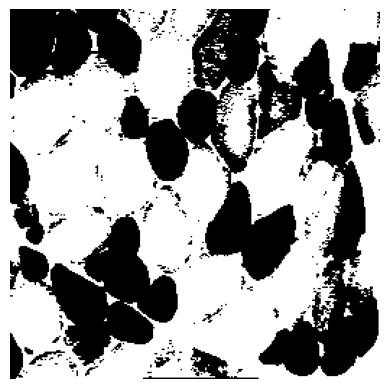

In [55]:
thres_value, thres_image = cv2.threshold(muscle, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thres_value)
plt.imshow(thres_image,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

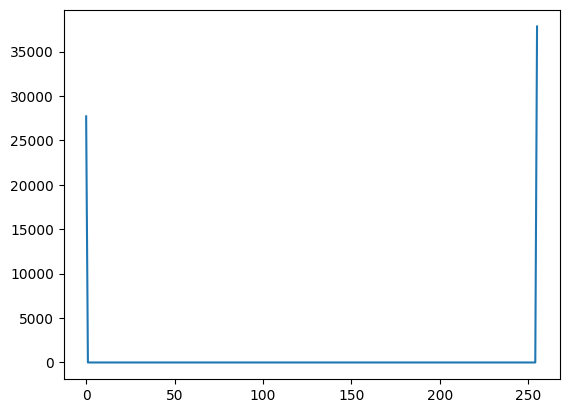

In [57]:
hist = cv2.calcHist([thres_image], [0], None, [256], [0, 256])
plt.plot(hist)

### ¿Qué resultado dan los métodos de umbralización automática (Otsu) basados sobre la varianza? ¿Cómo eligen estos métodos el umbral a aplicar?

Al realizar la umbralización automática se llega a un umbral de 125.0. Se llega a este umbral porque el método de Otsu busca maximizar la varianza entre clases (píxeles negros y blancos), minimizando simultáneamente la varianza dentro de cada clase. Este algoritmo prueba todos los posibles umbrales y selecciona el que mejor separa los píxeles en dos grupos homogéneos. A pesar de que 125 pueda generar la mejor varianza numéricamente, a mi parecer, se obtuvieron mejores resultados con el umbral de 80 calculado manualmente.  Esta elección dependerá de si se quiere priorizar la separación únicamente de las fibras más oscuras o la visualización del contorno completo de la fibra, a pesar de que pueda traer más ruido.